     ┌───────────┐     ┌───────────┐     ┌───────────┐     
q_0: ┤ Rx(θ_0_0) ├──■──┤ Rx(θ_1_0) ├──■──┤ Rx(θ_2_0) ├──■──
     ├───────────┤┌─┴─┐├───────────┤┌─┴─┐├───────────┤┌─┴─┐
q_1: ┤ Rx(θ_0_1) ├┤ X ├┤ Rx(θ_1_1) ├┤ X ├┤ Rx(θ_2_1) ├┤ X ├
     └───────────┘└───┘└───────────┘└───┘└───────────┘└───┘


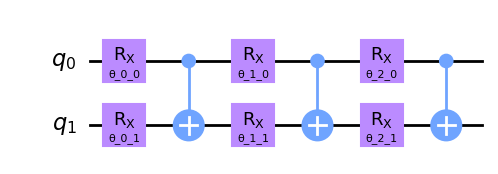

In [1]:
#-------------------------------------------------------------------------
# Variational Quantum Circuit
# Chapter 6 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
# Code demonstrates applying the phase separation step for two qubits
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work is required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import circuit_drawer
#-------------------------------------------------------------------------

def layered_pqc(num_qubits, num_layers):
    qc = QuantumCircuit(num_qubits)
    for layer in range(num_layers):
        for qubit in range(num_qubits):
            # Create a unique parameter for each layer and qubit
            theta = Parameter(f'θ_{layer}_{qubit}')
            qc.rx(theta, qubit)
        for i in range(num_qubits - 1):
            qc.cx(i, i + 1)  # Entangling gate
    return qc
#-------------------------------------------------------------------------

# Example of a layered PQC with 2 qubits and 3 layers
qc_example = layered_pqc(2, 3)
print(qc_example)

# Display the complete circuit
display(circuit_drawer(qc_example, output='mpl', style="iqp"))